# Housing Notebook
## ~ Nikhil Roy
---

## This notebook will examine housing in Pittsburgh, specifically, the percentage of occupied units, the median home value, and the established average years of residence. 

## The Dataset

In [2]:
import pandas as pd
import numpy as np
import geopandas as geo
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv("Housing 2010.csv", 
                                       index_col="Neighborhood")
weights = pd.read_csv("weights.csv")
data.head(10)

# % Occupied Units
# Median Home Value
# Est. Avg. Years of Residence

,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),Est. Avg. Yrs. of Residence (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,675,1052,0.515209,0.484791,535,0.100935,0.899065,0.0,...,0.012821,86500.0,109535.000000,136300.0,0.244351,NaN,0,0,0,0.000000
Allegheny West,3,462,390,355,0.749296,0.250704,203,0.182266,0.817734,15.0,...,0.574468,159700.0,202228.202312,123600.0,-0.388809,309940.0,7,0,1,0.002817
Allentown,6,2500,1505,1291,0.800155,0.199845,953,0.591815,0.408185,5.0,...,0.628886,34300.0,43434.109827,42200.0,-0.028413,8500.0,70,27,11,0.008521
Arlington,7,1869,880,886,0.865688,0.134312,754,0.653846,0.346154,11.0,...,0.723205,38800.0,49132.462428,44200.0,-0.100391,15397.0,34,12,13,0.014673
Arlington Heights,7,244,557,148,0.912162,0.087838,139,0.187050,0.812950,2.0,...,0.092391,45000.0,56983.526012,64400.0,0.130151,NaN,0,0,0,0.000000
Banksville,5,4144,2203,2118,0.954202,0.045798,2093,0.498806,0.501194,5.0,...,0.046419,87200.0,110421.410405,110900.0,0.004334,101430.5,40,7,5,0.002361
Bedford Dwellings,15,1202,1049,746,0.872654,0.127346,695,0.076259,0.923741,2.0,...,0.385902,17200.0,21780.369942,81100.0,2.723536,200.0,1,0,1,0.001340
Beechview,5,7974,4048,3939,0.892612,0.107388,3518,0.587265,0.412735,6.0,...,0.426939,56150.0,71102.777457,72400.0,0.018244,36067.5,128,64,40,0.010155
Beltzhoover,6,1925,1298,1085,0.734562,0.265438,849,0.734982,0.265018,17.0,...,0.673640,34000.0,43054.219653,36000.0,-0.163845,2744.0,39,12,11,0.010138


---
## Occupied Units Analysis

There are a few things required to be done before the analysis of the first column, percentage of occupied units, can be analyzed. Firstly, the percentage symbol of each cell from this column is stripped away using rstrip() and the data is converted from a string to a float. This column is now numerical.

Next, a new dataframe called "units" is created which consists of two columns: the names of the Pittsburgh neighborhoods and the numerical values of the percentage of occupied units.

The mean is calculated, converted to a float, and saved to the variable, "mean".

A new dataframe is created, called, "units_df", which is simply a replica of the data from units. Next, a new, blank column is created in units_df, called, "Falls Above Avg Percentage Occupied Units?".

Now, each cell is compared to the mean. If the data is above the mean, it gets assigned "Yes" in the "Falls Above Avg Percentage Occupied Units?" column. Otherwise, if the data is below the mean, it gets assigned "No" in this column.

Another new, blank column is now created in units_df. It is called, "Occupied Units Points", which will store the score (aka points) that each cell has. This score is calculated in the code that follows. Basically, all the cells which had "No" in the "Falls Above Avg Percentage Occupied Units?" column were assigned a score of 0. All the cells which had "Yes" were first sorted in descending order, and then they were counted. There were 52 cells assigned "Yes". The weight for Percentage Occupied Units was roughly 3.68. So each cell was assigned a score by multiplying its position with 3.68. For example, Chateau did best for percentage occupied units, so its score was 52 * 3.68 = 191.3.

Lastly, the values of percentage occupied units are sorted in descending order in units_df and the first 10 elements of the dataframe are printed.

In [3]:
# % Occupied Units

count = 0
for x in data["% Occupied Units (2010)"]:
     x = str(x).rstrip('%')
     data.iloc[count, 4] = float(x)
     count+=1

units = data.sort_values(by=['% Occupied Units (2010)'], ascending = False).iloc[0:, 4:5]
    
mean = float(units.mean())
units_df = pd.DataFrame(units)

units_df["Falls Above Avg Percentage Occupied Units?"] = np.nan

c = 0
for x in range(len(units)):
    temp = units.iloc[x,0]
    if temp > mean:
        units_df.iloc[x,1] = "Yes"
        c+=1
    else:
        units_df.iloc[x,1] = "No"

units_df["Occupied Units Points"] = np.nan

for x in range(len(units_df)):
    if(c-x > 0):
        units_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 4]
    else:
        units_df.iloc[x,2] = 0

units_df = units_df.sort_values(by=["% Occupied Units (2010)"], ascending=False)
units_df.head(8)

,% Occupied Units (2010),Falls Above Avg Percentage Occupied Units?,Occupied Units Points
Neighborhood,,,
Chateau,1.000000,Yes,233.701149
Swisshelm Park,0.963200,Yes,229.206897
Ridgemont,0.958716,Yes,224.712644
Oakwood,0.954466,Yes,220.218391
Banksville,0.954202,Yes,215.724138
Regent Square,0.951983,Yes,211.229885
Point Breeze,0.951269,Yes,206.735632
Glen Hazel,0.947791,Yes,202.241379


The map represents the percentage of occupied units for each neighborhood in Pittsburgh. The map was created by merging the units table we previously created with the shape file of the Pittsburgh map.

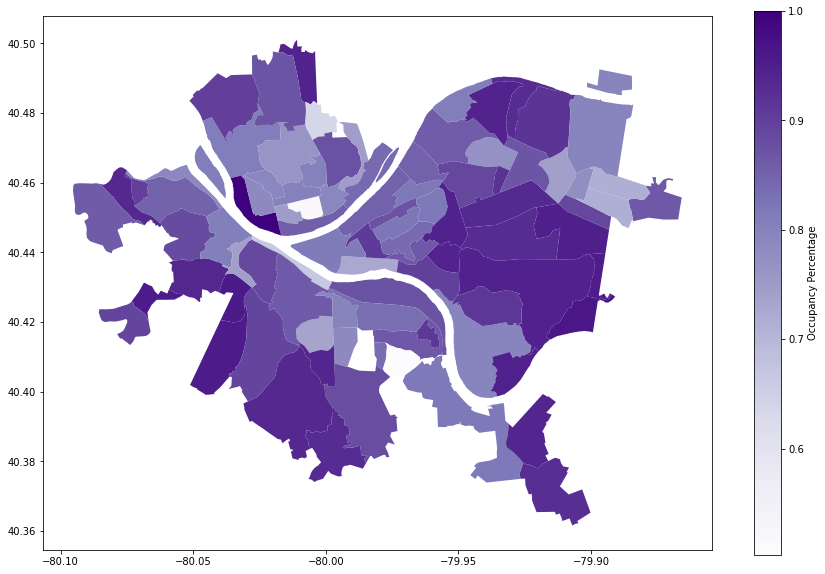

In [4]:
occ_series = units.groupby("Neighborhood").sum()['% Occupied Units (2010)']
neighborhoods = geo.read_file("pittsburgh-pa-neighborhoods.shp")
occ_map = neighborhoods.merge(occ_series, how='left', left_on='hood', right_on='Neighborhood')
occ_map.plot(column='% Occupied Units (2010)',
                  cmap='Purples',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Occupancy Percentage"})

---
## Median Home Value Analysis
The same process was repeated for median home value: the values were made numerical by removing the percentage symbol and commas, these values were put into a units table, the mean was calculated, and finally a score was given to the data by multiplying its position by the weight for median home value.

In [5]:
# Median Home Value

count = 0
for x in data["Median Home  Value (2010)"]:
    x = str(x).replace('$','')
    x = str(x).replace(',','')
    data.iloc[count, 20] = float(x)
    count+=1
    
mhv_units = data.sort_values(by=["Median Home  Value (2010)"], ascending=False).iloc[0:, 20:21]

mhv_mean = float(mhv_units.mean())

mhv_df = pd.DataFrame(mhv_units)
mhv_df["Below Mean?"] = np.nan

c = 0
for x in range(len(mhv_units)):
    mhv_temp = mhv_units.iloc[x,0]
    if mhv_temp < mhv_mean:
        mhv_df.iloc[x,1] = "Yes"
        c+=1
    else:
        mhv_df.iloc[x,1] = "No"
mhv_df = mhv_df.sort_values(by=["Median Home  Value (2010)"], ascending=True)

mhv_df["Median Home  Value Points"] = np.nan

for x in range(len(mhv_df)):
    if(c-x > 0):
        mhv_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 3]
    else:
        mhv_df.iloc[x,2] = 0
mhv_df.head(10)

,Median Home Value (2010),Below Mean?,Median Home Value Points
Neighborhood,,,
Bluff,21200.0,Yes,238.333333
West End,29800.0,Yes,234.000000
Homewood West,34500.0,Yes,229.666667
Larimer,34850.0,Yes,225.333333
Homewood North,35450.0,Yes,221.000000
Beltzhoover,36000.0,Yes,216.666667
Knoxville,39900.0,Yes,212.333333
East Hills,40700.0,Yes,208.000000
St. Clair,41100.0,Yes,203.666667


The map was created for median home value using the same process as done for percentage of occupied units.

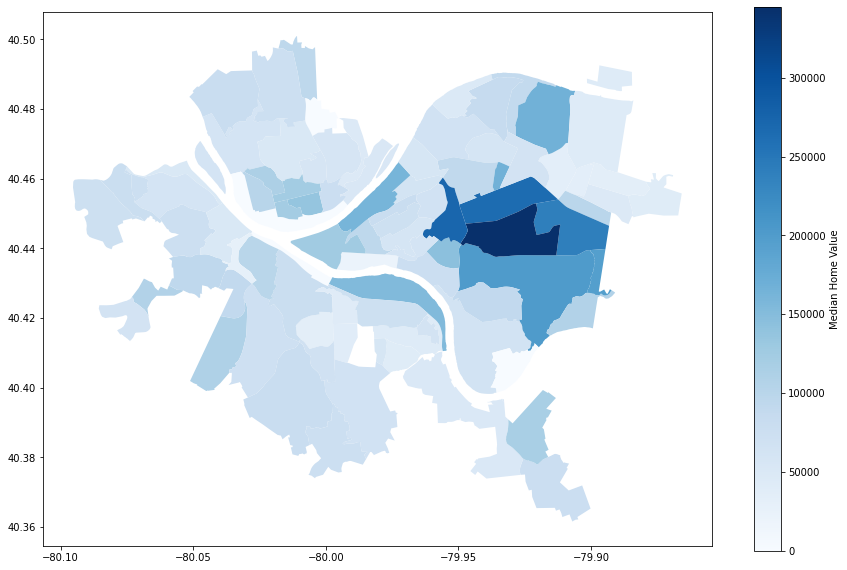

In [6]:
mhv_series = mhv_units.groupby("Neighborhood").sum()['Median Home  Value (2010)']
neighborhoods = geo.read_file("pittsburgh-pa-neighborhoods.shp")
mhv_map = neighborhoods.merge(mhv_series, how='left', left_on='hood', right_on='Neighborhood')
mhv_map.plot(column='Median Home  Value (2010)',
                    cmap='Blues',
                    figsize=(15,10),
                    legend=True,
                    legend_kwds={'label':"Median Home Value"})

---
## Established Average Years of Residence Analysis
The last metric in housing was established average years of residence, and it was analyzed using the same process as the previous metrics.

In [7]:
# Est. Avg. Years of Residence

count = 0
for x in data["Est. Avg. Yrs. of Residence (2010)"]:
    data.iloc[count, 9] = float(x)
    count+=1
    
yres_units = data.sort_values(by=["Est. Avg. Yrs. of Residence (2010)"], ascending=False).iloc[0:, 9:10]

yres_mean = float(yres_units.mean())

yres_df = pd.DataFrame(yres_units)
yres_df["Above Mean"] = np.nan

c = 0
for x in range(len(yres_df)):
    yres_temp = yres_units.iloc[x,0]
    if yres_temp > yres_mean:
        yres_df.iloc[x,1] = "Yes"
        c+=1
    else:
        yres_df.iloc[x,1] = "No"
        
yres_df["Avg. Yrs. of Residence Points"] = np.nan

for x in range(len(yres_df)):
    if(c-x > 0):
        yres_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 5]
    else:
        yres_df.iloc[x,2] = 0

yres_df.head(10)

,Est. Avg. Yrs. of Residence (2010),Above Mean,Avg. Yrs. of Residence Points
Neighborhood,,,
Chartiers City,32.0,Yes,128.735632
East Carnegie,30.0,Yes,125.057471
New Homestead,19.0,Yes,121.379310
Beltzhoover,17.0,Yes,117.701149
South Shore,16.0,Yes,114.022989
Overbrook,15.5,Yes,110.344828
Lincoln Place,15.0,Yes,106.666667
Bon Air,15.0,Yes,102.988506
Allegheny West,15.0,Yes,99.310345


This is the map for established average years of residence in Pittsburgh.

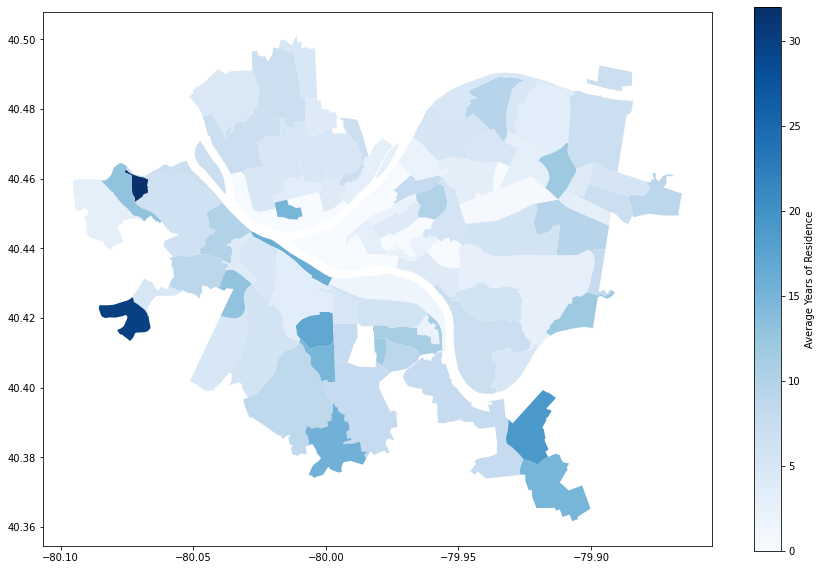

In [8]:
yres_series = yres_units.groupby("Neighborhood").sum()["Est. Avg. Yrs. of Residence (2010)"]
neighborhoods = geo.read_file("pittsburgh-pa-neighborhoods.shp")
yres_map = neighborhoods.merge(yres_series, how='left', left_on='hood', right_on='Neighborhood')
yres_map.plot(column='Est. Avg. Yrs. of Residence (2010)',
             cmap='Blues',
             figsize=(15,10),
             legend=True,
             legend_kwds={'label':"Average Years of Residence"}
             )

---

Finally, using pd.concat(), the three scores were concatenated together into one dataframe, and a new column called "Housing Final Score" simply adds up the three scores to get the final score for Housing. Here are the winners! The results were sorted by descending order of final score. Beltzhoover, Bon Air, and Larimer got the highest scores for housing!

In [9]:
housing_results = pd.concat([units_df.iloc[0:, 2:3], mhv_df.iloc[0:, 2:3],yres_df.iloc[0:,2:3]], axis=1, join='inner')
housing_results["Housing Final Score"] = np.nan
for x in range(len(housing_results)):
    housing_results.iloc[x,3] = 0
    for y in range(3):
        housing_results.iloc[x,3] += housing_results.iloc[x,y]
housing_results = housing_results.sort_values(by=["Housing Final Score"], ascending = False)
housing_results.head(10)

,Occupied Units Points,Median Home Value Points,Avg. Yrs. of Residence Points,Housing Final Score
Neighborhood,,,,
Bon Air,175.275862,78.000000,102.988506,356.264368
Beltzhoover,0.000000,216.666667,117.701149,334.367816
East Carnegie,89.885057,108.333333,125.057471,323.275862
Ridgemont,224.712644,0.000000,95.632184,320.344828
Swisshelm Park,229.206897,0.000000,88.275862,317.482759
Overbrook,143.816092,56.333333,110.344828,310.494253
Larimer,0.000000,225.333333,84.597701,309.931034
Arlington,35.954023,190.666667,77.241379,303.862069
East Hills,40.448276,208.000000,51.494253,299.942529


# Bon Air
## Beltzhoover
### East Carnegie 

---